<a href="https://colab.research.google.com/github/mogesTesema/Machine-Learning-Mastery-With-TensorFlow/blob/main/07_food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1: Food Vision Big


In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-43d16121-3351-06eb-d02a-ac3ec24e20a0)
GPU 1: Tesla T4 (UUID: GPU-58499345-f88c-a07d-9083-f1ce4d023355)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-10-25 06:40:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-10-25 06:40:47 (72.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

2025-10-25 06:40:50.493337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761374451.112545      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761374451.256683      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import tensorflow_datasets as tfds

In [5]:
(train_data,test_data),ds_info = tfds.load(name="food101",
                                          split=["train","validation"],
                                            shuffle_files=True,
                                           as_supervised=True,
                                           with_info=True
                                          )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.SIGFM5_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.SIGFM5_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


I0000 00:00:1761374922.709903      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761374922.710517      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [6]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [7]:
class_names = ds_info.features["label"].names


In [8]:
# Take on sample of train data
train_one_sample = train_data.take(1)


In [9]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image,label in train_one_sample:
    print(f"""
    Image shapes: {image.shape}
    Image datatype: {image.dtype}
    Target class from Food101 (tensor form): {label}
    Class name (str form): {class_names[label.numpy()]}
    """)


    Image shapes: (512, 512, 3)
    Image datatype: <dtype: 'uint8'>
    Target class from Food101 (tensor form): 90
    Class name (str form): spaghetti_bolognese
    


In [11]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 12,  13,   7],
        [ 12,  13,   7],
        [ 13,  14,   8],
        ...,
        [ 21,  11,   0],
        [ 21,  11,   0],
        [ 21,  11,   0]],

       [[ 12,  13,   7],
        [ 11,  12,   6],
        [ 11,  12,   6],
        ...,
        [ 21,  11,   0],
        [ 21,  11,   0],
        [ 21,  11,   0]],

       [[  7,   8,   2],
        [  7,   8,   2],
        [  7,   8,   2],
        ...,
        [ 22,  12,   2],
        [ 21,  11,   1],
        [ 20,  10,   0]],

       ...,

       [[188, 191, 184],
        [188, 191, 184],
        [188, 191, 184],
        ...,
        [243, 248, 244],
        [243, 248, 244],
        [242, 247, 243]],

       [[187, 190, 183],
        [189, 192, 185],
        [190, 193, 186],
        ...,
        [241, 245, 244],
        [241, 245, 244],
        [241, 245, 244]],

       [[186, 189, 182],
        [189, 192, 185],
        [191, 194, 187],
        ...,
        [238, 242, 24

In [12]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

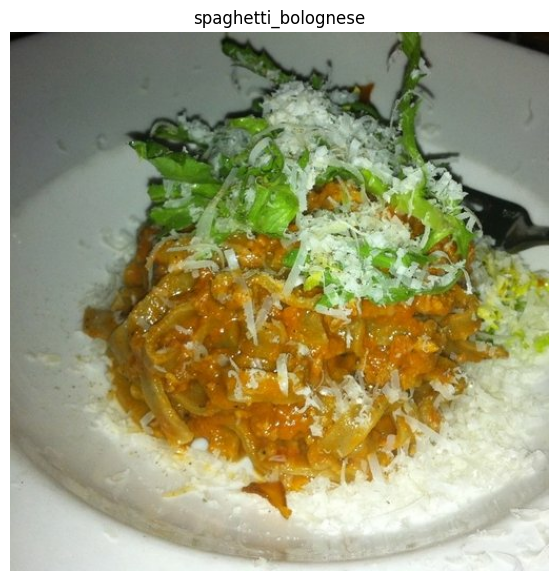

In [13]:
# plot an image
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [14]:
def preprocess_img(image,label,img_shape=224):
    """
    converts image datatype form 'uint8' -> 'float32' and reshpaes
    image to [img_shape,img_shape,color_channel]
    """
    image = tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(image,tf.float32),label

In [15]:
preprocessed_image = preprocess_img(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]}.. \nshape:{image.shape},\ndatatype: {image.dtype}")
print(f"iamge after preprocessing:\n{preprocessed_image[:2]}...\nshape:{preprocessed_image.shape}\ndatatype:{preprocessed_image.dtype} ")

Image before preprocessing:
 [[[12 13  7]
  [12 13  7]
  [13 14  8]
  ...
  [21 11  0]
  [21 11  0]
  [21 11  0]]

 [[12 13  7]
  [11 12  6]
  [11 12  6]
  ...
  [21 11  0]
  [21 11  0]
  [21 11  0]]].. 
shape:(512, 512, 3),
datatype: <dtype: 'uint8'>
iamge after preprocessing:
[[[11.586735   12.586735    6.586735  ]
  [11.714286   12.714286    6.714286  ]
  [ 8.857142    9.857142    4.8571424 ]
  ...
  [20.714308   11.142836    1.2857144 ]
  [20.668371   10.668372    0.        ]
  [21.         11.          0.        ]]

 [[ 2.3571415   3.3571415   0.1428566 ]
  [ 3.1530607   4.153061    0.07653028]
  [ 3.0561223   4.0561223   0.        ]
  ...
  [26.071407   18.071407    7.0714073 ]
  [24.785702   14.785702    4.7857018 ]
  [22.499966   12.499966    2.4999657 ]]]...
shape:(224, 224, 3)
datatype:<dtype: 'float32'> 


In [16]:
# batch and prepare datasets
train_data = train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)


In [17]:
train_data

<_ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [18]:
# shuffle training data and turn it into batchs and prefetch it(load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
# map preprocessing functions to test data
test_data = test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
# batch and prefetch
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [19]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [20]:
# Create modelling callbacks
checkpoint_path = "model_checkpoints/ckpt/checkpoint.weights.h5"
model_checkpoints = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                       monitor="val_acc",
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       verbose=0)



In [21]:
# setup mixed precisoin training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")


In [22]:
# Build feature extraction model
from tensorflow.keras import layers

# Create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Create functional model
inputs = layers.Input(shape=input_shape,name="input_layer")
x = base_model(inputs,training=False)
x = layers.GlobalAveragePooling2D(name="Pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32,name="output_layer_float32")(x)
model = tf.keras.Model(inputs,outputs)



16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [24]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [25]:
for index,layer in enumerate(model.layers):
  print(index,layer.name,layer.dtype,layer.trainable,layer.dtype_policy)

0 input_layer float32 True <DTypePolicy "mixed_float16">
1 efficientnetb0 float32 False <DTypePolicy "mixed_float16">
2 Pooling_layer float32 True <DTypePolicy "mixed_float16">
3 dense float32 True <DTypePolicy "mixed_float16">
4 output_layer_float32 float32 True <DTypePolicy "float32">


In [26]:
initial_epoch = 3
history_101_food_classes_feature_exract = model.fit(train_data,
          epochs=initial_epoch,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=int(0.15*len(test_data)),
          callbacks=[create_tensorboard_callback("training_logs","efficientNet_101_feature_extract"),model_checkpoints])

Saving TensorBoard log files to: training_logs/efficientNet_101_feature_extract/20251025-064848
Epoch 1/3


I0000 00:00:1761374945.034022      80 service.cc:148] XLA service 0x78fb0c84c040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761374945.038438      80 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761374945.038461      80 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761374947.015225      80 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1761374959.046768      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 118s 37ms/step - accuracy: 0.4745 - loss: 2.2880 - val_accuracy: 0.6954 - val_loss: 1.1351
Epoch 2/3


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 71s 29ms/step - accuracy: 0.6658 - loss: 1.2916 - val_accuracy: 0.7158 - val_loss: 1.0338
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 72s 30ms/step - accuracy: 0.7041 - loss: 1.1280 - val_accuracy: 0.7299 - val_loss: 1.0056


In [27]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.7260 - loss: 1.0089


In [28]:
results_feature_extract_model

[1.0028122663497925, 0.7292277216911316]

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling_layer                   │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 101)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_float32            │ (None, 101)            │             0 │
│ (Activation)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,437,720 (16.93 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 258,768 (1010.82 KB)

In [30]:
model.save("food_vision_model.keras")